Question: A client wants to open a restaurant in Washigton DC. What type of restaurant should they open and where in DC ? 


Method: 
This project will use Yelp Database, Uber eats APi and Census APi. It will also focus on ethnicity, ratings and localisation. 











In [65]:
import requests 
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from config import api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
from collections import defaultdict


In [2]:
#Northwest Analysis Data (NW)

#Name of the lists we are going to use to store the data from the Json File
name= []
rating = []
type1 =[]
lat = []
long = []
address = []
zipcode = []
state = []

# Url from the Json File + Usage of our api key
headers = {'Authorization': 'Bearer %s' % api_key}
url='https://api.yelp.com/v3/businesses/search'

#Loop to get the entire 1000 displayed in one page.
for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.944993",
                "longitude": "-77.078362",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)

    #json.dumps(data)
    
    
    #Store data needed into the lists

    for i in range(50):
     
        try:
            type1.append(data["businesses"][i]["categories"][0]["title"])
            name.append(data["businesses"][i]["name"])
            rating.append(data["businesses"][i]["rating"])
            lat.append(data["businesses"][i]["coordinates"]["latitude"])
            long.append(data["businesses"][i]["coordinates"]["longitude"])
            address.append(data["businesses"][i]["location"]["address1"])
            zipcode.append(data["businesses"][i]["location"]["zip_code"])
            state.append(data["businesses"][i]["location"]["state"])
        except:
            print(f'There is nothing on page {offset} in row {i}')
            
    

In [36]:
#NW DATAFRAME 

dictionary = {'name': name,
              "category": type1, 
              "latitude": lat, 
              "longitude":long, 
              'rating': rating,
              "address": address, 
              "State": state, 
              "Zipcode": zipcode
             
             }



NW = pd.DataFrame(dictionary)

#Store blanks adresss in New DF (foodtrucks have no addresses)
Foodtruck = NW.loc[NW['address'] == ''] 
Foodtrucka = NW.loc[NW['category'] == 'Food Truck']
Foodtruckb = NW.loc[NW['category'] == 'Food Trucks']
                    

#Replace None by NAN
NW = NW.fillna(value=np.nan)

#Get rid of NAN 
NW = NW.dropna(how = 'any')

#Get rid of blanks 
NW = NW.loc[NW['address'] != '']

test = []
for initial in NW['address']:
    test.append(initial[-2:].upper())
    

NW['initial'] = test 
NW = NW.loc[NW['category'] != 'Food Truck']
NW = NW.loc[NW['category'] != 'Food Trucks']
NW = NW.loc[NW['State'] == 'DC']
TBH = NW.loc[NW['initial'] != 'NW']

NW = NW.loc[NW['initial'] == 'NW']

NWClean = NW.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})

AnalysisNW= NW[["category", "rating"]].groupby("category").mean()
AnalysisNW2= NWClean[["category", "rating"]].groupby("category").mean()
NW_typerest = NWClean.groupby('category')['name'].count()



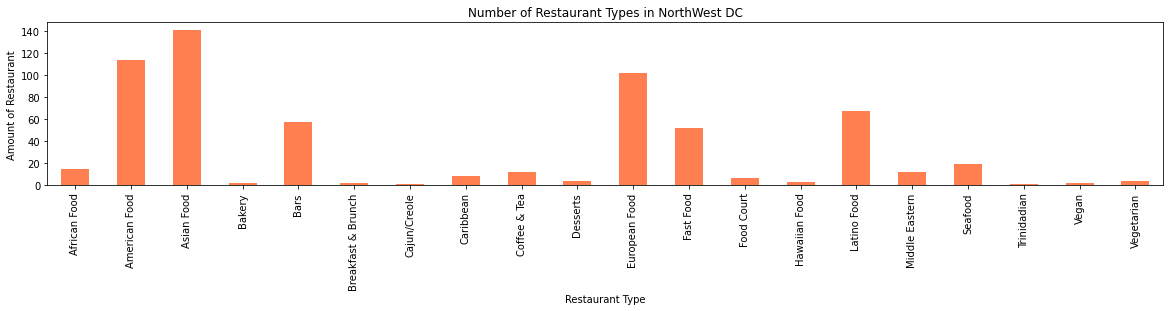

In [38]:
#Plot of #Restaurant type in NW
NW_num = NW_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in NorthWest DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

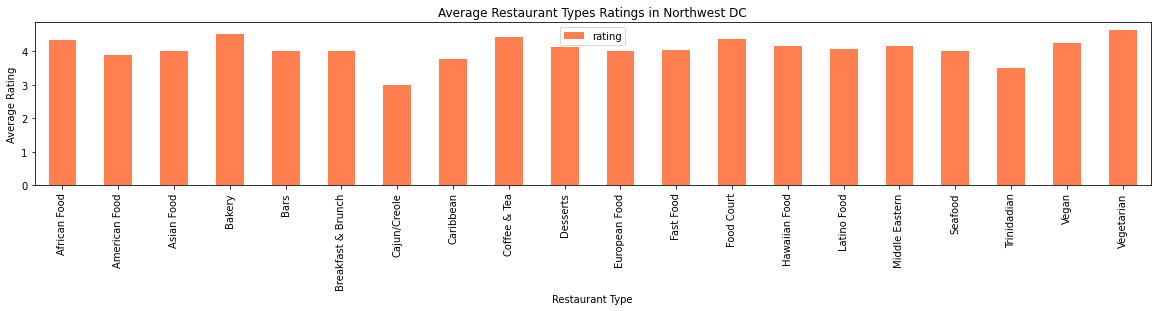

In [39]:
#Graph of NW restaurants regrouped
NW_grouped = AnalysisNW2.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Northwest DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.show()



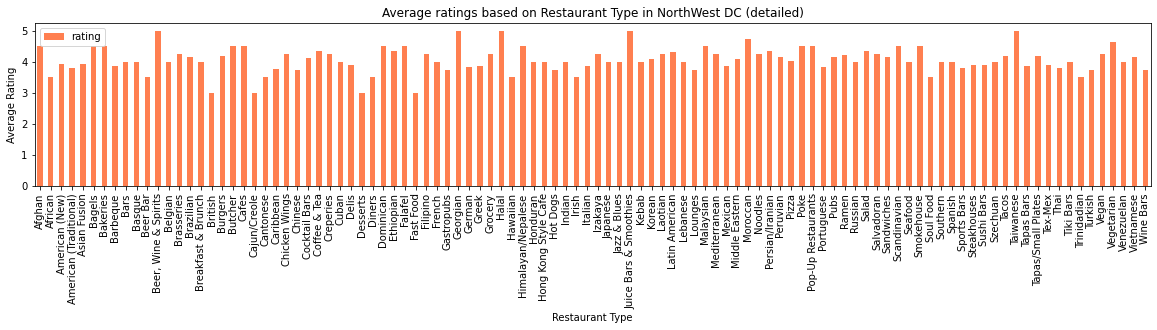

In [37]:
#Restaurant ratings of NW dc restaurant based on unsorted categories 
NW_D = AnalysisNW.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type in NorthWest DC (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")

plt.show()


In [6]:
#NE offset and list

#NE AREA = 14.552 miles squared
name2= []
rating2 = []
type2 = []
lat2 = []
long2 = []
address2 = []
zipcode2 = []
state2 = []


for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.925193",
                "longitude": "-76.985428",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)


    for i in range(50):
     
        try:
            type2.append(data["businesses"][i]["categories"][0]["title"])
            name2.append(data["businesses"][i]["name"])
            rating2.append(data["businesses"][i]["rating"])
            lat2.append(data["businesses"][i]["coordinates"]["latitude"])
            long2.append(data["businesses"][i]["coordinates"]["longitude"])
            address2.append(data["businesses"][i]["location"]["address1"])
            zipcode2.append(data["businesses"][i]["location"]["zip_code"])
            state2.append(data["businesses"][i]["location"]["state"])
             
        except:
            print(f'There is nothing on page {offset} in row {i}')
           



There is nothing on page 700 in row 36


In [41]:
#NE DATAFRAME 

dictionary = {'name': name2,
              "category": type2, 
              "latitude": lat2, 
              "longitude":long2, 
              'rating': rating2,
             "State": state2, 
              "Zipcode": zipcode2,
              "address": address2, 
              #'initials': initials, 
             }



NE= pd.DataFrame(dictionary)

#Store blanks adresss in New DF (foodtrucks have no addresses)
Foodtruck2 = NE.loc[NE['address'] == ''] 
Foodtruck2a = NE.loc[NE['category'] == 'Food Truck']
Foodtruck2b = NE.loc[NE['category'] == 'Food Trucks']
                    

#Replace None by NAN
NE = NE.fillna(value=np.nan)

#Get rid of NAN 
NE = NE.dropna(how = 'any')

#Get rid of blanks 
NE = NE.loc[NE['address'] != '']

test2 = []
for initial in NE['address']:
    test2.append(initial[-2:].upper())
    

NE['initial'] = test2 

NE = NE.loc[NE['State'] == 'DC']
NE = NE.loc[NE['category'] != 'Food Truck']
NE = NE.loc[NE['category'] != 'Food Trucks']
TBH2 = NE.loc[NE['initial'] != 'NE']
NE = NE.loc[NE['initial'] == 'NE']
NE['category'].value_counts()

NEClean = NE.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})

AnalysisNE= NE[["category", "rating"]].groupby("category").mean()
AnalysisNE2= NEClean[["category", "rating"]].groupby("category").mean()
NE_typerest = NEClean.groupby('category')['name'].count()


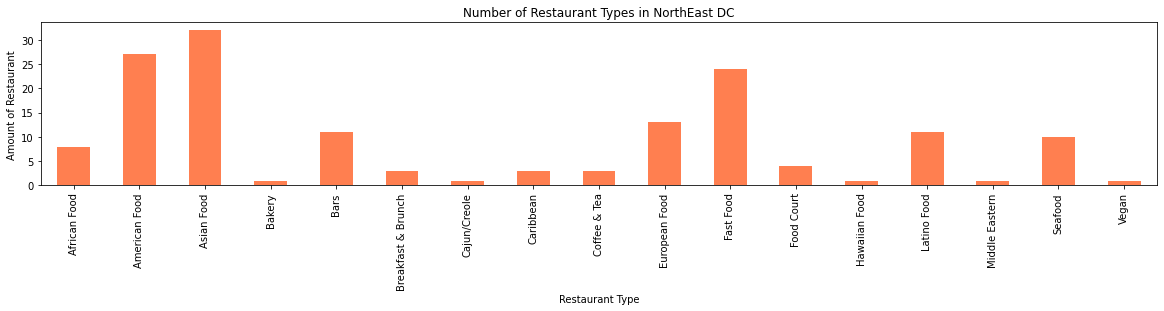

In [52]:
#Plot of #Restaurant type in NE
NE_num = NE_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in NorthEast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

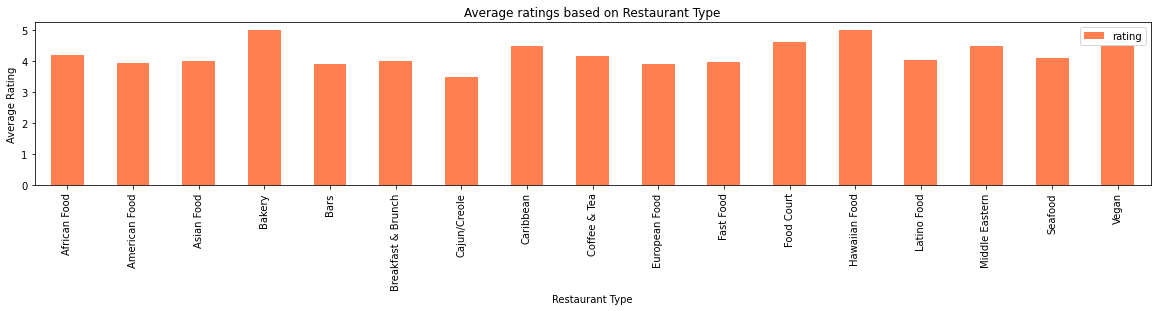

In [8]:
NE_grouped = AnalysisNE2.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")

plt.show()


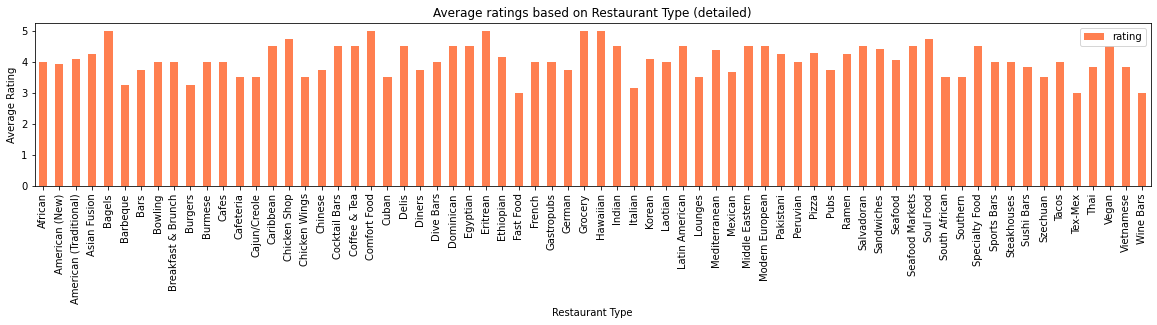

In [50]:
NE_D = AnalysisNE.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")

plt.show()


In [10]:
name3= []
rating3 = []
type3 = []
lat3 = []
long3 = []
address3  = []
zipcode3 = []
state3 = []


for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.900244",
                "longitude": "-77.037211",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)


    for i in range(50):
     
        try:
            type3.append(data["businesses"][i]["categories"][0]["title"])
            name3.append(data["businesses"][i]["name"])
            rating3.append(data["businesses"][i]["rating"])
            lat3.append(data["businesses"][i]["coordinates"]["latitude"])
            long3.append(data["businesses"][i]["coordinates"]["longitude"])
            address3.append(data["businesses"][i]["location"]["address1"])
            zipcode3.append(data["businesses"][i]["location"]["zip_code"])
            state3.append(data["businesses"][i]["location"]["state"])
        except:
            print(f'There is nothing on page {offset} in row {i}')
           

In [53]:
#SE DATAFRAME 

dictionary = {'name': name3,
              "category": type3, 
              "latitude": lat3, 
              "longitude":long3, 
              'rating': rating3,
              "State": state3, 
              "Zipcode": zipcode3,
              "address": address3, 
              #'initials': initials, 
             }



SE = pd.DataFrame(dictionary)

#Store blanks adresss in New DF (foodtrucks have no addresses)
Foodtruck3 = SE.loc[SE['address'] == '']
Foodtruck3a = SE.loc[SE['category'] == 'Food Truck']
Foodtruck3b = SE.loc[SE['category'] == 'Food Trucks']

#Get rid of blanks 
SE = SE.loc[SE['address'] != '']

#Replace None by NAN
SE = SE.fillna(value=np.nan)

#Get rid of NAN 
SE = SE.dropna(how = 'any')


                    

test3 = []
for initial in SE['address']:
    test3.append(initial[-2:].upper())
    

SE['initial'] = test3 

SE = SE.loc[SE['State'] == 'DC']
SE = SE.loc[SE['category'] != 'Food Truck']
SE = SE.loc[SE['category'] != 'Food Trucks']
TBH3 = SE.loc[SE['initial'] != 'SE']
SE = SE.loc[SE['initial'] == 'SE']


SEClean = SE.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})




AnalysisSE= SE[["category", "rating"]].groupby("category").mean()
AnalysisSE2= SEClean[["category", "rating"]].groupby("category").mean()

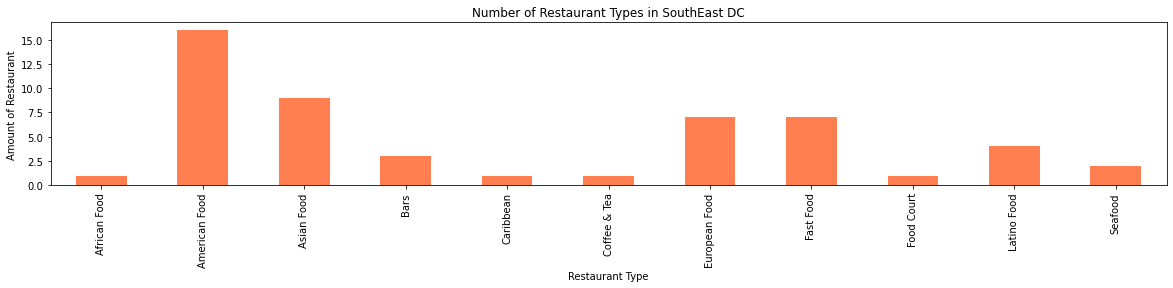

In [54]:
#Plot of #Restaurant type in SE
SE_typerest = SEClean.groupby('category')['name'].count()
SE_num = SE_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in SouthEast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

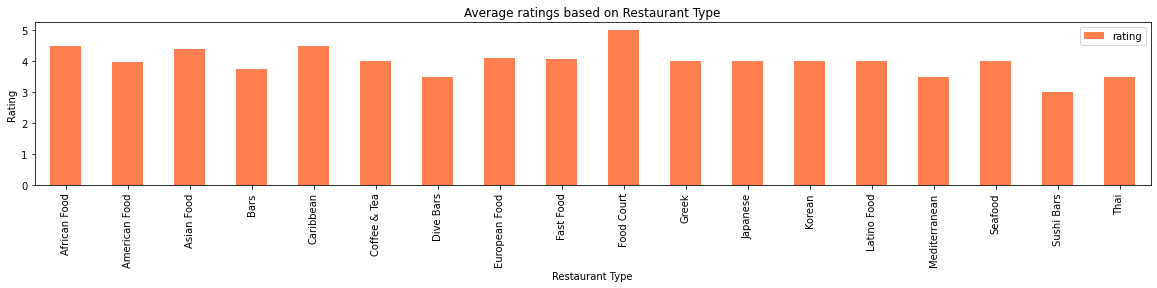

In [45]:
#Graph of SE restaurants regrouped
SE_grouped = AnalysisSE2.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()




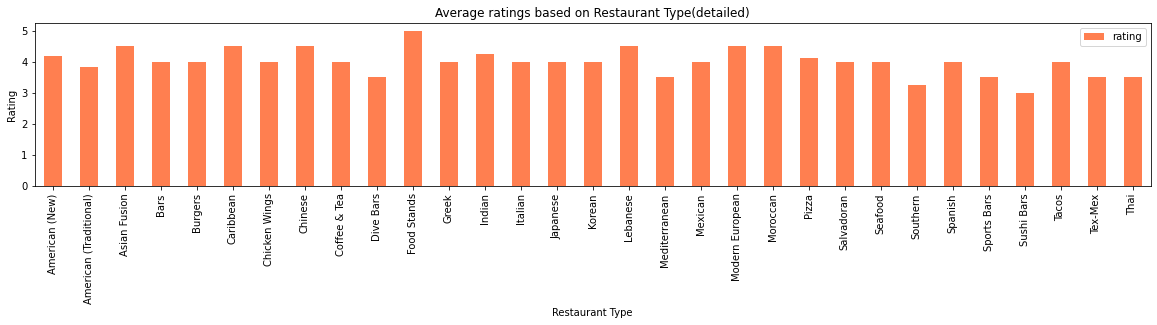

In [46]:
#SE restaurants detailed
SE_Detailed = AnalysisSE.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type(detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()


In [14]:
name4= []
rating4 = []
type4 = []
lat4 = []
long4 = []
address4 = []
zipcode4 = []
state4 = []



for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.889729",
                "longitude": "-76.989957",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)


    for i in range(50):
     
        try:
            type4.append(data["businesses"][i]["categories"][0]["title"])
            name4.append(data["businesses"][i]["name"])
            rating4.append(data["businesses"][i]["rating"])
            lat4.append(data["businesses"][i]["coordinates"]["latitude"])
            long4.append(data["businesses"][i]["coordinates"]["longitude"])
            address4.append(data["businesses"][i]["location"]["address1"])
            zipcode4.append(data["businesses"][i]["location"]["zip_code"])
            state4.append(data["businesses"][i]["location"]["state"])
        except:
            print(f'There is nothing on page {offset} in row {i}')
           

In [55]:
#SW DATAFRAME 

dictionary = {'name': name4,
              "category": type4, 
              "latitude": lat4, 
              "longitude":long4, 
              'rating': rating4,
              "State": state4, 
              "Zipcode": zipcode4,
              "address": address4, 
              #'initials': initials, 
             }



SW = pd.DataFrame(dictionary)

#Store Foodtrucks in different DF (most of them don't have adresses)
Foodtruck4 = SW.loc[SW['address'] == ''] 
Foodtruck4a = SW.loc[SW['category'] == 'Food Truck']
Foodtruck4b = SW.loc[SW['category'] == 'Food Trucks']
                    
                    
#Replace None value by NAN
SW = SW.fillna(value=np.nan)

#Get rid of NAN 
SW = SW.dropna(how = 'any')

#Get rid of blanks 
SW = SW.loc[SW['address'] != '']

test4 = []
for initial in SW['address']:
    test4.append(initial[-2:].upper())
    

SW['initial'] = test4 

SW = SW.loc[SW['State'] == 'DC']
SW = SW.loc[SW['category'] != 'Food Truck']
SW = SW.loc[SW['category'] != 'Food Trucks']
TBH4 = SW.loc[SW['initial'] != 'SW']
SW = SW.loc[SW['initial'] == 'SW']

SW['category'].value_counts()
SWClean = SW.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})


AnalysisSW= SW[["category", "rating"]].groupby("category").mean()
AnalysisSW2= SWClean[["category", "rating"]].groupby("category").mean()





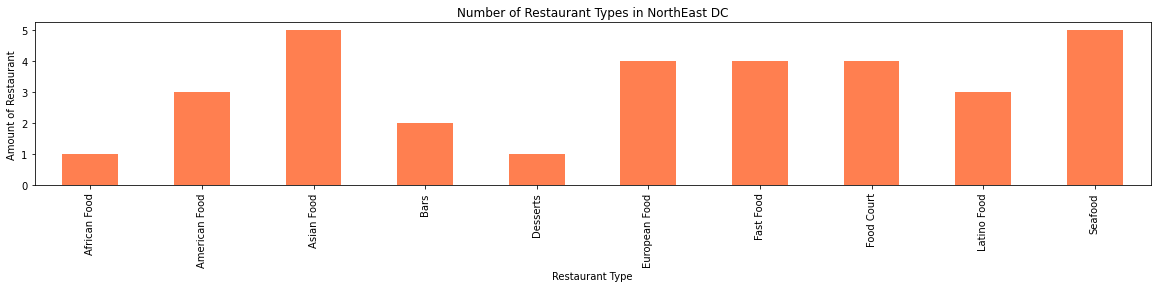

In [56]:
#Plot of #Restaurant type in SouthWest
SW_typerest = SWClean.groupby('category')['name'].count()
SW_num = SW_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in NorthEast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

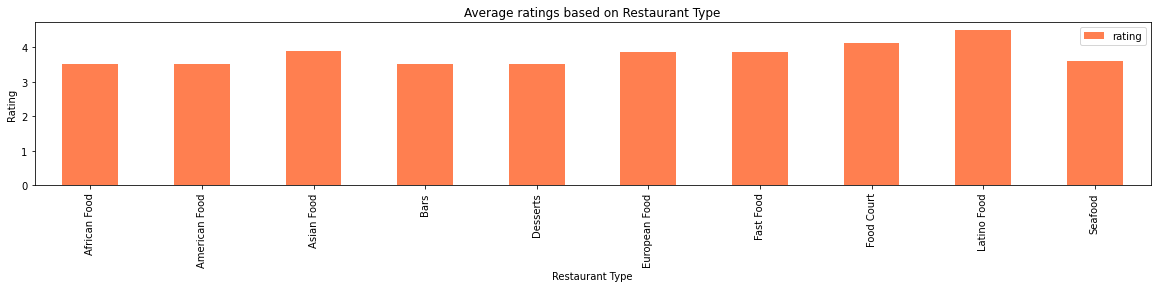

In [57]:
#Graph of SW restaurants regrouped
SW_grouped = AnalysisSW2.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()

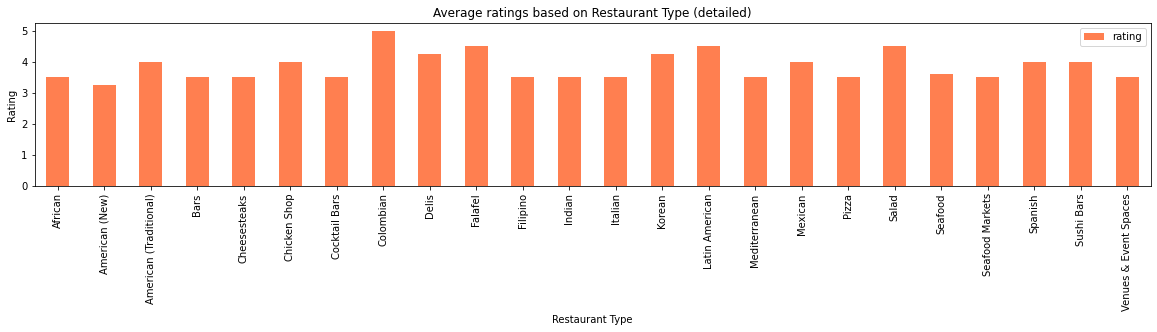

In [58]:
#SE restaurants detailed
SW_Detailed = AnalysisSW.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()

In [18]:
frames = [NE, NW, SE, SW]
DC = pd.concat(frames)

DC.reset_index(inplace = True, drop = True)
DC

,name,category,latitude,longitude,rating,State,Zipcode,address,initial
0,Spicy Water African Grill,African,38.923818,-76.986295,5.0,DC,20018,1325 Rhode Island Ave NE,NE
1,Crab Boss,Seafood,38.899989,-76.992466,4.0,DC,20002,1001 H Street NE,NE
2,Roaming Rooster - Restaurant,Chicken Shop,38.929472,-76.960557,4.5,DC,20018,3176 Bladensburg Rd NE,NE
3,Brookland's Finest,American (New),38.929418,-76.991030,4.0,DC,20017,3126 12th St NE,NE
4,Primrose,French,38.927750,-76.990880,4.0,DC,20017,3000 12th St NE,NE
5,Ivy City SmokeHouse,Seafood,38.914630,-76.985550,3.5,DC,20002,1356 Okie St NE,NE
6,Mozzeria,Pizza,38.900400,-76.988064,5.0,DC,20002,1300 H St NE,NE
7,Menomale Pizza Napoletana,Bars,38.924859,-76.990149,4.0,DC,20018,2711 12th St NE,NE
8,Masala Story,Indian,38.930785,-76.990665,4.5,DC,20017,3301 12th St NE,NE
9,Cane,Caribbean,38.900000,-77.000320,4.5,DC,20002,403 H St NE,NE


In [19]:
DC['category'].value_counts()

American (New)            63
Pizza                     44
Italian                   43
American (Traditional)    35
Seafood                   34
Mexican                   33
Bars                      30
Indian                    25
Sushi Bars                24
Thai                      23
Mediterranean             20
French                    20
Korean                    19
Chinese                   17
Latin American            16
Vietnamese                16
Steakhouses               16
Ethiopian                 15
Burgers                   14
Caribbean                 13
Barbeque                  12
Middle Eastern            12
Sandwiches                11
Cocktail Bars             11
Ramen                     11
Tacos                     10
Cafes                     10
Greek                      9
Asian Fusion               9
Southern                   9
Peruvian                   8
Pubs                       8
Sports Bars                8
Spanish                    8
Delis         

In [26]:
DC_Clean = DC.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Gluten-Free":"Food Court",
     "Health Markets":"Food Court", "Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})

DC_Clean['category'].value_counts()

Asian Food            187
American Food         160
European Food         126
Fast Food              87
Latino Food            86
Bars                   74
Seafood                36
African Food           25
Coffee & Tea           16
Food Court             16
Caribbean              13
Middle Eastern         13
Breakfast & Brunch      5
Desserts                5
Vegetarian              4
Hawaiian Food           4
Bakery                  3
Vegan                   3
Cajun/Creole            2
Trinidadian             1
Name: category, dtype: int64

In [30]:
DC_typerest = DC_Clean.groupby('category')['name'].count()
DC_typerest

category
African Food           25
American Food         160
Asian Food            187
Bakery                  3
Bars                   74
Breakfast & Brunch      5
Cajun/Creole            2
Caribbean              13
Coffee & Tea           16
Desserts                5
European Food         126
Fast Food              87
Food Court             16
Hawaiian Food           4
Latino Food            86
Middle Eastern         13
Seafood                36
Trinidadian             1
Vegan                   3
Vegetarian              4
Name: name, dtype: int64

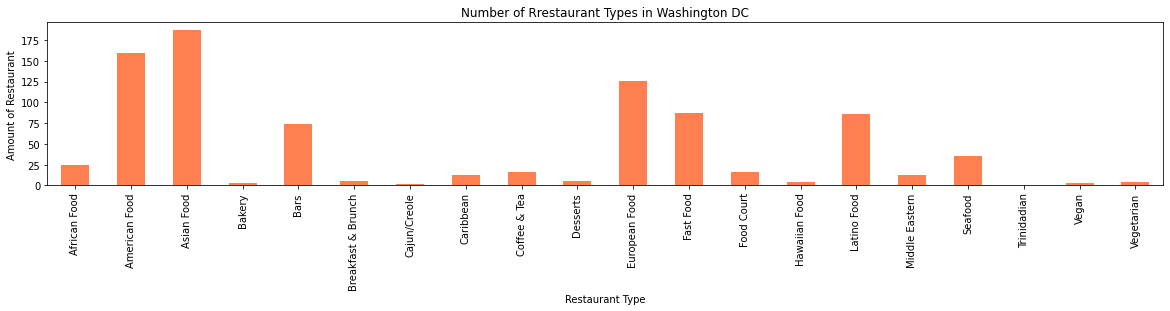

In [32]:
#Plot of # restaurant type in DC
DC_num = DC_typerest.plot(kind="bar", color='coral', title = "Number of Rrestaurant Types in Washington DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()



In [60]:
Analysis1 = DC_Clean[["category", "rating"]].groupby("category").mean()


In [61]:
Analysis1.describe()

,rating
count,20.000000
mean,4.092804
std,0.335335
min,3.250000
25%,3.978175
50%,4.009958
75%,4.335938
max,4.666667


In [62]:
Analysis2 = DC[["category", "rating"]].groupby("category").mean()
Analysis2

,rating
category,
Afghan,4.500000
African,3.750000
American (New),3.952381
American (Traditional),3.842857
Asian Fusion,4.055556
Bagels,4.750000
Bakeries,4.500000
Barbeque,3.750000
Bars,3.966667


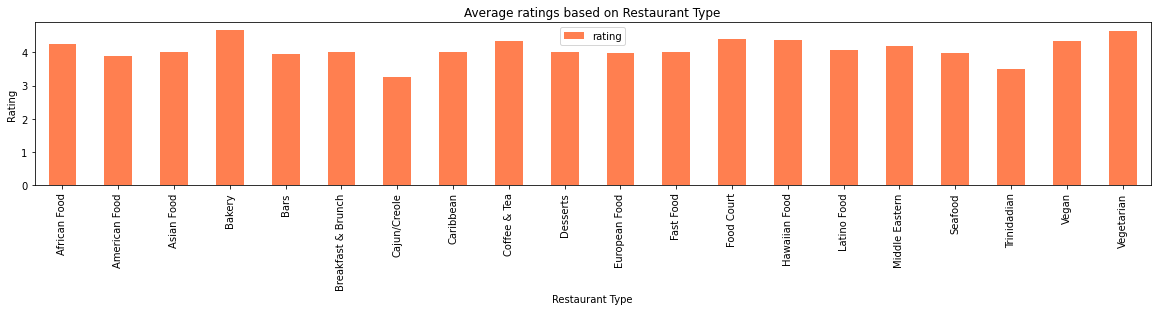

In [63]:
#Broad Graph 

DC_grouped = Analysis1.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()



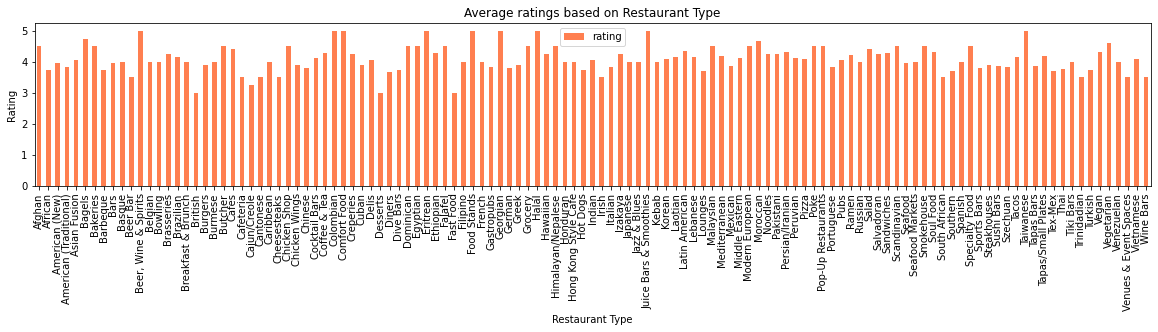

In [64]:

DC_Detailed = Analysis2.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()



In [ ]:
frames = [Foodtruck,Foodtrucka, Foodtruckb, Foodtruck2, Foodtruck2a, Foodtruck2b, Foodtruck3, Foodtruck3a, Foodtruck3b, Foodtruck4, Foodtruck4a, Foodtruck4b]
FoodtruckDC = pd.concat(frames)
FoodtruckDC['Duplicate'] = FoodtruckDC.duplicated()
FoodtruckDC = FoodtruckDC.loc[FoodtruckDC['State'] == "DC" ]
FoodtruckDC

In [ ]:
FoodtruckDC = FoodtruckDC.loc[FoodtruckDC['Duplicate'] == False ]

FoodtruckDC

In [ ]:
frames = [TBH, TBH2, TBH3, TBH4]
TBHDC = pd.concat(frames)
TBHDC

In [66]:
TBHDC = TBHDC.loc[TBHDC['initial'] != "SW"]
TBHDC = TBHDC.loc[TBHDC['initial'] != "NW"]
TBHDC = TBHDC.loc[TBHDC['initial'] != "NE"]
TBHDC = TBHDC.loc[TBHDC['initial'] != "SE"]

TBHDC['Duplicate'] = TBHDC.duplicated()
TBHDC

TBHDC = TBHDC.loc[TBHDC['Duplicate'] == False ]
TBHDC

TBHDC




NameError: name 'TBHDC' is not defined

In [ ]:
correct = defaultdict(list)
for i in range(len(TBHDC['address'])): 
    if  ("S E" in TBHDC['address'][i].split())|\
        ("se" in TBHDC['address'][i].split())| \
        ("SE" in TBHDC['address'][i].split())|\
        ("s e" in TBHDC['address'][i].split())|\
        ("s e" in TBHDC['address'][i].split())|\
        ("S e" in TBHDC['address'][i].split())|\
        ("s E" in TBHDC['address'][i].split())|\
        ("S W" in TBHDC['address'][i].split())|\
        ("sw" in TBHDC['address'][i].split())|\
        ("SW" in TBHDC['address'][i].split())|\
        ("s w" in TBHDC['address'][i].split())|\
        ("S w" in TBHDC['address'][i].split())|\
        ("s W" in TBHDC['address'][i].split())|\
        ("N E" in TBHDC['address'][i].split())|\
        ("ne" in TBHDC['address'][i].split())|\
        ("NE" in TBHDC['address'][i].split())|\
        ("n e" in TBHDC['address'][i].split())|\
        ("N e" in TBHDC['address'][i].split())|\
        ("n E" in TBHDC['address'][i].split())|\
        ("N W" in TBHDC['address'][i].split())|\
        ("nw" in TBHDC['address'][i].split())|\
        ("NW" in TBHDC['address'][i].split())|\
        ("n w" in TBHDC['address'][i].split())|\
        ("N w" in TBHDC['address'][i].split())|\
        ("n W" in TBHDC['address'][i].split()):
            correct.append(i)
        
    

print(correct)
            
            
            
    
    
    
    
    
    
    
    